In [43]:
# importing libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

In [19]:
# loading features and labels
data = load_digits()
X = data.data
y = data.target

In [20]:
# look at data description first
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [15]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
X.shape, y.shape

((1797, 64), (1797,))

In [69]:
# score using Decision Tree
dec_tr = DecisionTreeClassifier()
dec_val_score = cross_val_score(dec_tr, X, y, cv=10)
ans_1 = dec_val_score.mean()
ans_1

0.8347268777157046

In [70]:
# writing the anwer in txt file
with open('ans_1.txt', 'w') as file:
    file.write(f'{ans_1}')

In [76]:
# score using Bagging with 100 trees
bag = BaggingClassifier(dec_tr, n_estimators=100)
bag_val_score_100 = cross_val_score(bag, X, y, cv=10)
ans_2 = bag_val_score_100.mean()
ans_2

0.9248417132216016

In [77]:
# writing 2nd answer in txt
with open('ans_2.txt', 'w') as file:
    file.write(f'{ans_2}')

In [91]:
# choose 8 features out of 64
bag_sqrt_features = BaggingClassifier(dec_tr, max_features=8, n_estimators=100)
bag_val_score_sqrt_f = cross_val_score(bag_sqrt_features, X, y, cv=10)
ans_3 = bag_val_score_sqrt_f.mean()
ans_3

0.9298851644941031

In [92]:
with open('ans_3.txt', 'w') as file:
    file.write(f'{ans_3}')

In [93]:
# choose 8 features in each node
dec_tr_rand_feat = DecisionTreeClassifier(max_features="sqrt")
bag_tr_rand_feat = BaggingClassifier(dec_tr_rand_feat, n_estimators=100)
bag_val_score_tr_rand_feat = cross_val_score(bag_tr_rand_feat, X, y, cv=10)
ans_4 = bag_val_score_tr_rand_feat.mean()
ans_4

0.9488019863438858

In [94]:
with open('ans_4.txt', 'w') as file:
    file.write(f'{ans_4}')

In [40]:
# RandomForest by default without restriction in max_depth
rand_for = RandomForestClassifier()
rand_for_val_score = cross_val_score(rand_for, X, y)
score_5 = rand_for_val_score.mean()
score_5

0.9371402042711235

In [46]:
# RFC with n_trees from 1 to 200 with step 20
n_trees = list(range(1, 200, 20))
scores = []
for n in n_trees:
    rand_for = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(rand_for, X, y).mean())

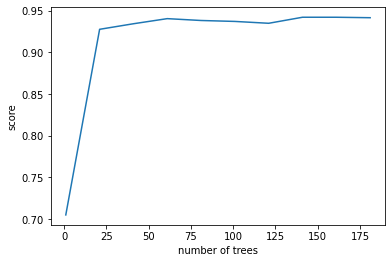

In [48]:
_ = plt.plot(n_trees, scores)
_ = plt.xlabel('number of trees')
_ = plt.ylabel('score')

In [50]:
# RFC with max_depth from 1 to 10
depthes = list(range(1, 10))
scores = []
for depth in depthes:
    rand_for = RandomForestClassifier(max_depth=depth)
    scores.append(cross_val_score(rand_for, X, y).mean())

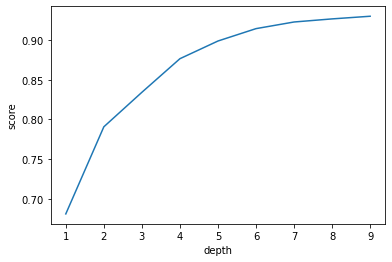

In [51]:
_ = plt.plot(depthes, scores)
_ = plt.xlabel('depth')
_ = plt.ylabel('score')

In [55]:
scores[4]

0.8987387805632931

In [56]:
# RFC with max_features from 1 to 64
n_features = list(range(1, 64))
scores = []
for n in n_features:
    rand_for = RandomForestClassifier(max_features=n)
    scores.append(cross_val_score(rand_for, X, y).mean())

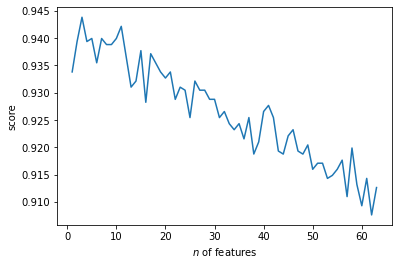

In [58]:
_ = plt.plot(n_features, scores)
_ = plt.xlabel('$n$ of features')
_ = plt.ylabel('score')

We see that with max_depth or n_trees but not n_features growth, score is getting better.

In [57]:
with open('ans_5.txt', 'w') as file:
    file.write('2 3 4 7')